In [5]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline
import transformers

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.transforms import RandAugment
from IPython.core.debugger import set_trace
import os

import numpy as np
import matplotlib.pyplot as plt
import math

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
model_id = "CompVis/stable-diffusion-v1-4"

In [9]:
fixed_model = StableDiffusionPipeline.from_pretrained(model_id,
                                                torch_dtype=torch.float16,
                                                use_safetensors=True,
                                                variant="fp16")
fixed_model.to(device)

fine_tuned_model = DiffusionPipeline.from_pretrained(model_id,
                                                torch_dtype=torch.float16,
                                                use_safetensors=True,
                                                variant="fp16")
fine_tuned_model.to(device)

prompt = "An astronaut riding a green horse"

images = fixed_model(prompt=prompt).images[0]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [30]:
(np.array(images)/255.).shape

(512, 512, 3)

In [16]:
prompt2 = "An astronaut riding a green horse"

images2 = fixed_model(prompt=prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

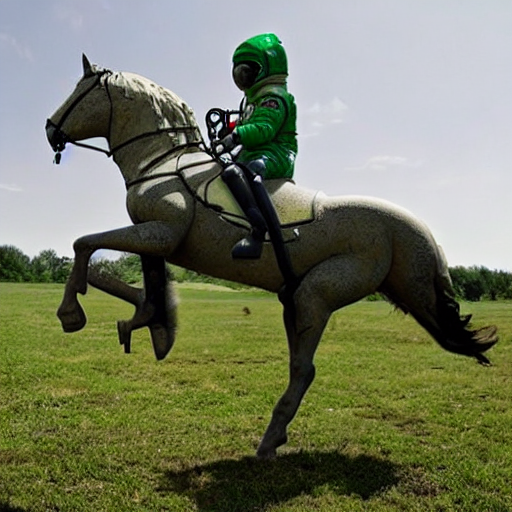

In [21]:
images2.images[0]

In [22]:
criterion = nn.MSELoss()
loss = criterion(images, images2.images[0])

TypeError: 'tuple' object is not callable

In [23]:
print(print(dir(images.__class__)))

['_Image__transformer', '__array_interface__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_close_exclusive_fp_after_loading', '_copy', '_crop', '_dump', '_ensure_mutable', '_expand', '_get_safe_box', '_new', '_repr_png_', 'alpha_composite', 'close', 'convert', 'copy', 'crop', 'draft', 'effect_spread', 'entropy', 'filter', 'format', 'format_description', 'frombytes', 'getbands', 'getbbox', 'getchannel', 'getcolors', 'getdata', 'getexif', 'getextrema', 'getim', 'getpalette', 'getpixel', 'getprojection', 'height', 'histogram', 'load', 'paste', 'point', 'putalpha', 'putdata', 'putpalette', 'putpixel', 'quantize

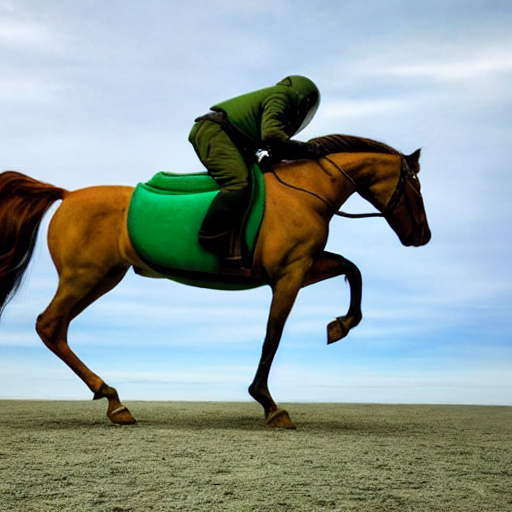

In [28]:
images.convert()

In [31]:
images2.images[0].size

(512, 512)

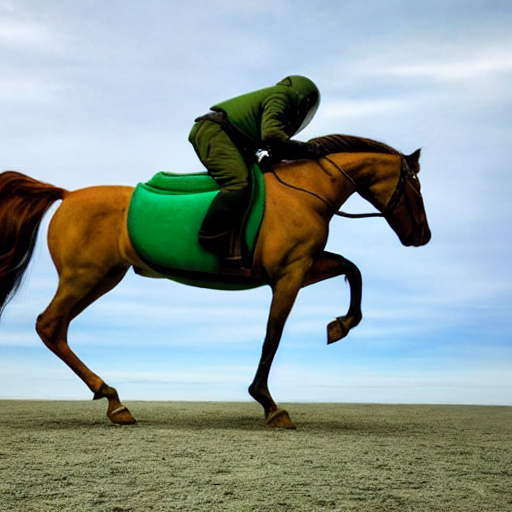

In [32]:
images